# Dragon Real Estate price predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_excel("housing.xlsx")

In [3]:
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

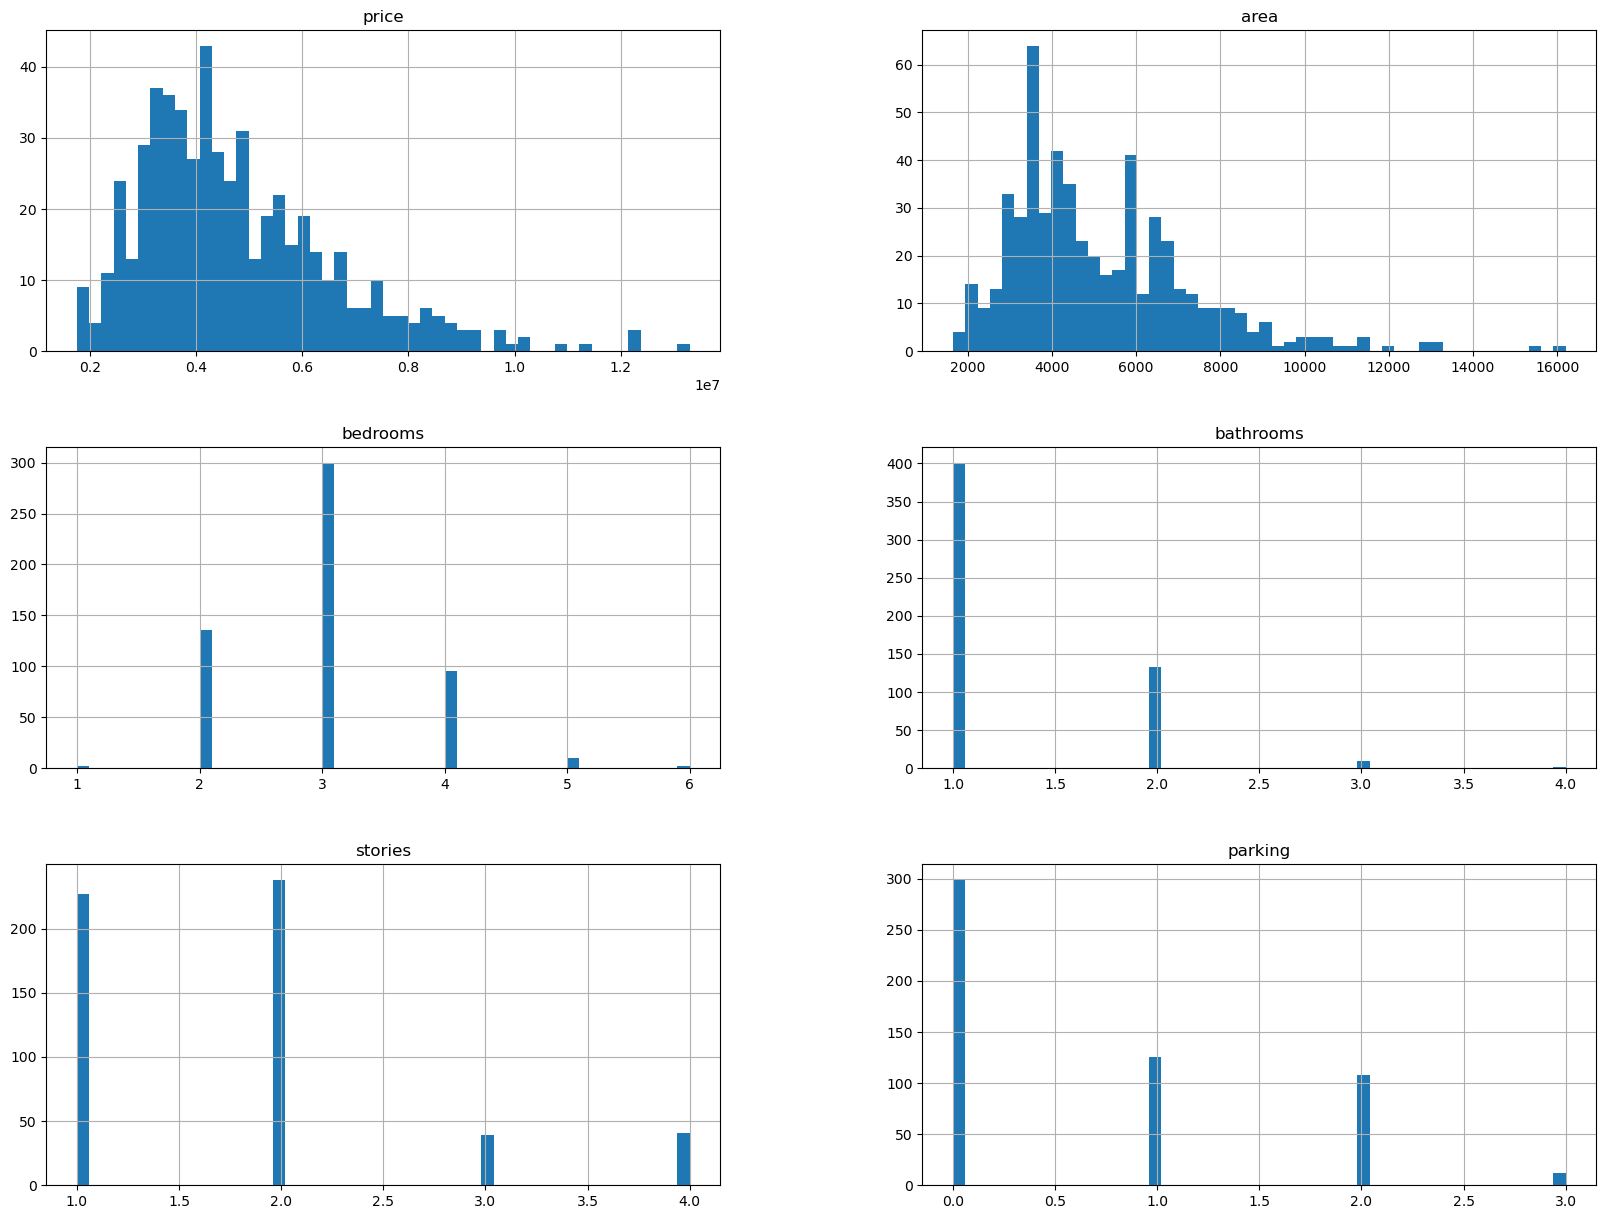

In [10]:
housing.hist(bins=50, figsize=(20,15))

# Train test Splitting

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled= np.random.permutation(len(data))
    test_set_size= int(len(data)* test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [12]:
train_set, test_set= split_train_test(housing, 0.2)

In [13]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 436
Rows in test set: 109



In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['hotwaterheating']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [16]:
 strat_test_set.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000
mean,4.688844e+06,4789.146789,3.000000,1.275229,1.834862,0.550459
std,1.830511e+06,1841.435294,0.720082,0.542142,0.855416,0.821992
min,1.750000e+06,1650.000000,2.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3420.000000,3.000000,1.000000,1.000000,0.000000
50%,4.277000e+06,4320.000000,3.000000,1.000000,2.000000,0.000000
75%,5.652500e+06,6000.000000,3.000000,1.000000,2.000000,1.000000
max,1.225000e+07,10500.000000,5.000000,4.000000,4.000000,3.000000


In [17]:
strat_train_set

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
398,3500000,3120,3,1,2,yes,no,no,no,no,1,no,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
65,6930000,8880,3,2,2,yes,no,yes,no,yes,1,no,furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished
296,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3640000,4130,3,2,2,yes,no,no,no,no,2,no,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
156,5523000,6900,3,1,1,yes,yes,yes,no,no,0,yes,semi-furnished
175,5250000,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished


In [18]:
 strat_test_set['hotwaterheating'].value_counts()

no     104
yes      5
Name: hotwaterheating, dtype: int64

In [19]:
104/5

20.8

In [20]:
 strat_train_set['hotwaterheating'].value_counts()

no     416
yes     20
Name: hotwaterheating, dtype: int64

In [21]:
416/20


20.8


# Looking for Correlations

In [22]:
corr_matrix = housing.corr()

C:\Users\arshd\AppData\Local\Temp\ipykernel_2668\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [23]:
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

housing=pd.read_excel("housing.xlsx")
# Separate features (X) and target (y)
X = housing.drop(columns=['price'])  # Drop the target column
y = housing['price']  # The 'price' column is your target variable

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test to use for training and evaluating your machine learning models.


In [55]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='area', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='stories', ylabel='price'>,
        <Axes: xlabel='parking', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='bedrooms', ylabel='area'>,
        <Axes: xlabel='stories', ylabel='area'>,
        <Axes: xlabel='parking', ylabel='area'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='area', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='stories', ylabel='bedrooms'>,
        <Axes: xlabel='parking', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='stories'>,
        <Axes: xlabel='area', ylabel='stories'>,
        <Axes: xlabel='bedrooms', ylabel='stories'>,
        <Axes: xlabel='stories', ylabel='stories'>,
        <Axes: xlabel='parking', ylabel='stor

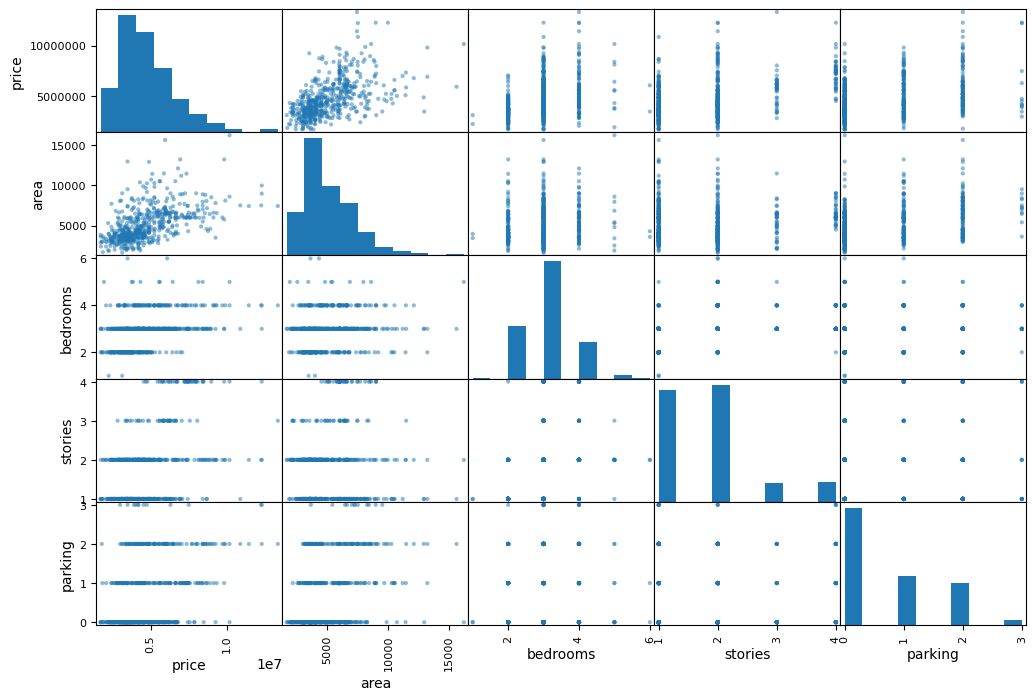

In [56]:
from pandas.plotting import scatter_matrix
attributes=["price", "area", "bedrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating" , "airconditioning", "parking", "prefarea","furnishingstatus"]
scatter_matrix(housing[attributes], figsize =(12,8))

<Axes: xlabel='price', ylabel='area'>

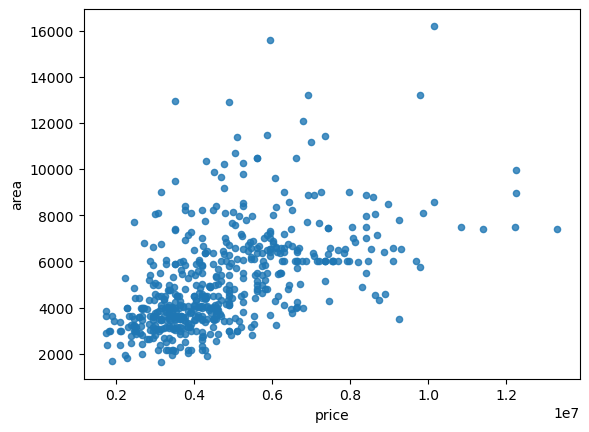

In [57]:
 housing.plot (kind= "scatter", x= "price", y= "area", alpha= 0.8)

# Attribute combination

In [58]:
housing['areaparking']= housing['area']/housing['parking']

In [59]:
housing['areaparking']

0      3710.000000
1      2986.666667
2      4980.000000
3      2500.000000
4      3710.000000
          ...     
540    1500.000000
541            inf
542            inf
543            inf
544            inf
Name: areaparking, Length: 545, dtype: float64

In [60]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,areaparking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3710.000000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2986.666667
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4980.000000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2500.000000
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3710.000000


In [61]:
a= housing.dropna(subset=["area"])

In [62]:
a.shape

(545, 14)

In [63]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,areaparking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3710.000000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2986.666667
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4980.000000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2500.000000
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3710.000000


In [64]:
median= housing["stories"].median()

In [65]:
median

2.0

In [66]:
housing["stories"].fillna(median)

0      3
1      4
2      2
3      2
4      2
      ..
540    1
541    1
542    1
543    1
544    2
Name: stories, Length: 545, dtype: int64

In [104]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,areaparking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3710.000000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,2986.666667
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4980.000000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,2500.000000
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3710.000000


In [131]:
housing.drop("areaparking", axis=1).shape

(545, 13)

In [132]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","prefarea", "furnishingstatus"]
one_hot= OneHotEncoder()
transformer =ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder= "passthrough")
transformed_x =transformer.fit_transform(housing)
transformed_x

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.00000000e+00, 2.00000000e+00, 3.71000000e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.00000000e+00, 3.00000000e+00, 2.98666667e+03],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 2.00000000e+00, 4.98000000e+03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00,            inf],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00,            inf],
       [0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00,            inf]])

In [135]:
import pandas as pd

In [136]:
housing.drop("areaparking", axis=1).shape

(545, 13)

In [137]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,13300000.0,7420.0,4.0,2.0,3.0,2.0,3710.000000
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,12250000.0,8960.0,4.0,4.0,4.0,3.0,2986.666667
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,12250000.0,9960.0,3.0,2.0,2.0,2.0,4980.000000
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,12215000.0,7500.0,4.0,2.0,2.0,3.0,2500.000000
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,11410000.0,7420.0,4.0,1.0,2.0,2.0,3710.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1820000.0,3000.0,2.0,1.0,1.0,2.0,1500.000000
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1767150.0,2400.0,3.0,1.0,1.0,0.0,inf
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1750000.0,3620.0,2.0,1.0,1.0,0.0,inf
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1750000.0,2910.0,3.0,1.0,1.0,0.0,inf


In [141]:
df[df['areaparking'] == ''].index

Int64Index([], dtype='int64')

In [143]:
df[df['price'] == ''].index

Int64Index([], dtype='int64')

In [144]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy ="median")
imputer.fit(transformed_x)

ValueError: Input X contains infinity or a value too large for dtype('float64').